In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

Step 1: read in data from the .xls file

In [26]:
DATA_FILE = '../data/fire_theft.xls'

book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

Step 2: create placeholders for input X (number of fire) and label Y (number of theft)

In [27]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

Step 3: create weight and bias, initialized to 0

In [28]:
w = tf.Variable(0.0, name='w')
b = tf.Variable(0.0, name='b')

Step 4: build model to predict Y

In [29]:
Y_predicted = w * X + b

Step 5: use the square error as the loss function

In [30]:
loss = tf.square(Y - Y_predicted)

Step 5a: implement Huber loss function from lecture and try it out

In [31]:
def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, lambda: small_res, lambda: large_res)

In [32]:
loss = huber_loss(Y, Y_predicted)

Step 6: using gradient descent with learning rate of 0.01 to minimize loss

In [33]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

In [34]:
sess = tf.Session() # prefer with tf.Session() as sess: in your code

Step 7: initialize the necessary variables, in this case, w and b

In [35]:
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)

Step 8: train the model

In [36]:
for i in range(50): # train the model 50 epochs
    total_loss = 0
    for x, y in data:
        # Session runs train_op and fetch values of loss
        _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
        total_loss += l
    print('Epoch {0}: {1}'.format(i, total_loss/float(n_samples)))

# close the writer when you're done using it
writer.close() 

Epoch 0: 20.78248843943168
Epoch 1: 17.50859196980794
Epoch 2: 17.4305895169576
Epoch 3: 17.352587575004215
Epoch 4: 17.274585337865922
Epoch 5: 17.19658306666783
Epoch 6: 17.118580625170754
Epoch 7: 17.040578206380207
Epoch 8: 16.962575844355992
Epoch 9: 16.884573743456887
Epoch 10: 16.806571415492467
Epoch 11: 16.72856881504967
Epoch 12: 16.65056662332444
Epoch 13: 16.571892325367248
Epoch 14: 16.492146340864046
Epoch 15: 16.413320473262242
Epoch 16: 16.30321256887345
Epoch 17: 16.163563262139046
Epoch 18: 16.11937266659169
Epoch 19: 15.898687094449997
Epoch 20: 16.000069537710043
Epoch 21: 15.550613852705629
Epoch 22: 15.847923231266794
Epoch 23: 15.378744841043261
Epoch 24: 15.718445868364402
Epoch 25: 15.07969512905748
Epoch 26: 15.622706598430383
Epoch 27: 15.03285538813188
Epoch 28: 15.483305489622234
Epoch 29: 14.700076886962744
Epoch 30: 15.408367949582281
Epoch 31: 14.959289304745782
Epoch 32: 14.97500896063589
Epoch 33: 14.652242356113025
Epoch 34: 15.152217206500826
Epoch 3

Step 9: output the values of w and b

In [37]:
w, b = sess.run([w, b])

Step 10: plot the results

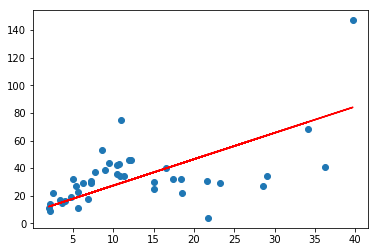

In [38]:
X, Y = data[:, 0], data[:, 1]
plt.scatter(X, Y, label="Real data")
plt.plot(X, w * X + b, label="Predicted data", color='r')
plt.show()

In [39]:
sess.close()